In [5]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

import sklearn

In [6]:
data = pd.read_csv("data/derived_accused_cases_trials.csv")
data.head(3)

,AccusedRef,AccusedSystemId,AccusedID,FirstName,LastName,M_Firstname,M_Surname,Alias,Patronymic,DesTitle,...,Exec_county,Exec_burgh,Exec_NGR_Letters,Exec_NGR_Easting,Exec_NGR_Northing,PostTrialNotes,Createdby_y,Createdate_y,Lastupdatedby_y,Lastupdatedon_y
0,A/EGD/10,EGD,10.0,Mareon,Quheitt,Marion,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,jhm,08/07/02 15:23:55,LEM,10/28/02 13:06:53
1,A/EGD/100,EGD,100.0,Thom,Cockburn,Thomas,Cockburn,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LEM,07/24/02 16:01:21,LEM,07/24/02 16:01:23
2,A/EGD/1000,EGD,1000.0,Christian,Aitkenhead,Christine,Aikenhead,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,LEM,07/18/01 16:13:27,jhm,10/01/02 10:48:24


In [7]:
data.shape

(3795, 205)

In [8]:
# Features we are interested in 
list_of_trial_features = ['Execution', 'Noreftocentral', 'Localwithcrep', 'Circuit', 'Cjtorder', 'Defence', 'High_status', 
                          'Male_accusers', 'Female_accusers', 'Confrontingsuspects', 'ActionDropped', 'Fled', 'Arrest', 
                          'Watching', 'TrialType']

list_of_accused_features = ['AccusedRef', 'M_Firstname', 'M_Surname', 'Alias', 'Patronymic', 'DesTitle', 'Sex', 'Age', 
                            'Res_settlement', 'Res_parish', 'Res_presbytery',  'Res_county', 'Res_burgh', 'Ethnic_origin', 
                            'MaritalStatus', 'SocioecStatus', 'Occupation', 'Notes']

list_of_cases_features = ['CaseRef', 'CaseStart_date', 'CaseStart_date_as_date', 'Case_date', 'Case_date_as_date', 'Age_at_case', 
                          'CaseCommonName', 'Complaint', 'Correspondence', 'Chronicle', 'Suspects_text', 'Familiars', 'Shape-Changing', 
                          'Dreams/Visions', 'UnorthodoxReligiousPractice', 'SympatheticMagic', 'Ridingdead', 'FolkNotes', 
                          'HumanIllness', 'HumanDeath', 'AnimalIllness', 'AnimalDeath', 'FemaleInfertility', 'MaleImpotence', 
                          'AggravatingDisease', 'TransferringDisease', 'LayingOn', 'Removalbewitchment', 'Quarreling', 'Cursing', 
                          'Poisoning', 'RecHealer', 'HealingHumans', 'HealingAnimals', 'Midwifery', 'DiseaseNotes', 'PropertyDamage', 
                          'WeatherModification', 'OtherMaleficiaNotes', 'OtherChargesNotes', 'ClaimedBewitched', 'ClaimedPossessed', 
                          'AdmitLesserCharge', 'ClaimedNaturalCauses', 'Nodefence', 'DefenseNotes', 'CaseNotes', 'PoliticalMotive_s', 
                          'PropertyMotive_p', 'PropertyMotive_s', 'RefusedCharity_p', 'RefusedCharity_s', 'Treason_p', 'Treason_s', 
                          'Other_p', 'Other_s', 'OtherText', 'NotEnoughInfo_p', 'NotEnoughInfo_s', 'WhiteMagic_p', 'WhiteMagic_s', 
                          'Charnotes', 'DemonicPact', 'DevilNotes', 'WitchesMeeting', 'MeetingName', 'DevilPresent', 'Maleficium', 
                          'CommunalSex', 'DevilWorship', 'FoodAndDrink', 'Dancing', 'Singing', 'SingingText', 'OtherPractices', 
                          'MeetingNotes', 'Elphane/Fairyland', 'Food/Drink', 'SpecificVerbalFormulae', 'SpecificRitualActs', 
                          'UNorthodoxRelPract_p', 'UNorthodoxRelPract_s', 'Consulting_p', 'Consulting_s', 'Demonic_p', 'Demonic_s', 
                          'Demonic_possess_p', 'Demonic_possess_s', 'Fairies_p', 'Fairies_s', 'Folk_healing_p', 'Folk_healing_s', 
                          'Maleficium_p', 'Maleficium_s', 'Midwifery_p', 'Midwifery_s', 'ImplicatedByAnother_p', 'ImplicatedByAnother_s', 
                          'Neighbhd_dispute_p', 'Neighbhd_dispute_s', 'PoliticalMotive_p']

In [9]:
#Limit data to important features.
all_features = list_of_accused_features + list_of_cases_features + list_of_trial_features
df = data[all_features]

In [10]:
#Drop columns with more than 70% missing values.
percent_non_null = 0.8
df = df.dropna(axis = 1, thresh=df.shape[0]*percent_non_null)
df.head()

,AccusedRef,M_Firstname,M_Surname,Sex,Res_county,CaseRef,Case_date,Case_date_as_date,CaseCommonName,Familiars,...,Defence,High_status,Male_accusers,Female_accusers,Confrontingsuspects,ActionDropped,Fled,Arrest,Watching,TrialType
0,A/EGD/10,Marion,White,Female,Haddington,C/EGD/21,3/4/1661,04/03/61 00:00:00,"Quheitt,Mareon",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
1,A/EGD/100,Thomas,Cockburn,Male,Haddington,C/EGD/111,1591,06/01/91 00:00:00,"Cockburn,Thom",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,A/EGD/1000,Christine,Aikenhead,Female,Dumfries,C/EGD/1011,6/5/1628,05/06/28 00:00:00,"Aitkenhead,Christian",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,A/EGD/1001,Janet,Ireland,Female,Dumfries,C/EGD/1012,6/5/1628,05/06/28 00:00:00,"Ireland,Janet",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,A/EGD/1002,Agnes,Henderson,Female,Stirling,C/EGD/1013,3/7/1628,07/03/28 00:00:00,"Hendersoun,Agnes",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [11]:
df.shape

(3795, 101)

In [12]:
df.describe(include="all")

,AccusedRef,M_Firstname,M_Surname,Sex,Res_county,CaseRef,Case_date,Case_date_as_date,CaseCommonName,Familiars,...,Defence,High_status,Male_accusers,Female_accusers,Confrontingsuspects,ActionDropped,Fled,Arrest,Watching,TrialType
count,3594,3550,3558,3544,3474,3788,3774,3773,3788,3788.000000,...,3211.000000,3211.000000,3209.000000,3208.000000,3211.000000,3211.000000,3211.00000,3211.000000,3211.000000,3211.000000
unique,3219,159,1168,2,34,3413,1164,1159,3047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A/EGD/820,Janet,Thomson,Female,Haddington,C/EGD/39,17/4/1662,04/17/62 00:00:00,3 unnamed witches,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,544,66,3030,658,3,93,93,109,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003432,...,0.013080,0.008409,0.418199,0.255923,0.032077,0.012457,0.03052,0.151355,0.006851,2.536593
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058489,...,0.113635,0.091326,2.510500,1.627914,0.176233,0.110932,0.17204,0.358450,0.082502,0.927673
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000


In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [14]:
missing_value_df.sort_values("percent_missing", ascending=False).head(50)

,column_name,percent_missing
Female_accusers,Female_accusers,15.467721
Male_accusers,Male_accusers,15.441370
TrialType,TrialType,15.388669
Noreftocentral,Noreftocentral,15.388669
Localwithcrep,Localwithcrep,15.388669
Circuit,Circuit,15.388669
Cjtorder,Cjtorder,15.388669
Defence,Defence,15.388669
High_status,High_status,15.388669
Confrontingsuspects,Confrontingsuspects,15.388669


In [15]:
df.columns

Index(['AccusedRef', 'M_Firstname', 'M_Surname', 'Sex', 'Res_county',
       'CaseRef', 'Case_date', 'Case_date_as_date', 'CaseCommonName',
       'Familiars',
       ...
       'Defence', 'High_status', 'Male_accusers', 'Female_accusers',
       'Confrontingsuspects', 'ActionDropped', 'Fled', 'Arrest', 'Watching',
       'TrialType'],
      dtype='object', length=101)

In [16]:
df.shape

(3795, 101)

In [17]:
"CommunalSex" in df.columns

True

In [18]:
df.CommunalSex.value_counts()

0.0    3781
1.0       7
Name: CommunalSex, dtype: int64

In [19]:
percent_missing = df.isna().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [20]:
missing_value_df.sort_values("percent_missing", ascending=True).head(50)


,column_name,percent_missing
WhiteMagic_p,WhiteMagic_p,0.184453
DevilWorship,DevilWorship,0.184453
CommunalSex,CommunalSex,0.184453
Maleficium,Maleficium,0.184453
DevilPresent,DevilPresent,0.184453
WitchesMeeting,WitchesMeeting,0.184453
DemonicPact,DemonicPact,0.184453
WhiteMagic_s,WhiteMagic_s,0.184453
FoodAndDrink,FoodAndDrink,0.184453
ImplicatedByAnother_p,ImplicatedByAnother_p,0.184453


In [21]:
df.WhiteMagic_p.value_counts()

0.0    3781
1.0       7
Name: WhiteMagic_p, dtype: int64

In [22]:
df.WhiteMagic_s.value_counts()

0.0    3695
1.0      93
Name: WhiteMagic_s, dtype: int64

In [23]:
"Sex" in df.columns

True

In [24]:
df.Sex.value_counts()

Female    3030
Male       514
Name: Sex, dtype: int64

In [25]:
df.Folk_healing_p.value_counts()

0.0    3740
1.0      48
Name: Folk_healing_p, dtype: int64

In [26]:
df.Folk_healing_s.value_counts()

0.0    3618
1.0     170
Name: Folk_healing_s, dtype: int64

In [27]:
df.Demonic_possess_p.value_counts()

0.0    3730
1.0      58
Name: Demonic_possess_p, dtype: int64

In [28]:
df.Demonic_possess_s.value_counts()

0.0    3701
1.0      87
Name: Demonic_possess_s, dtype: int64

In [29]:
df.UNorthodoxRelPract_p.value_counts()

0.0    3788
Name: UNorthodoxRelPract_p, dtype: int64

In [30]:
df.UNorthodoxRelPract_s.value_counts()

0.0    3677
1.0     111
Name: UNorthodoxRelPract_s, dtype: int64

In [31]:
df.UnorthodoxReligiousPractice.value_counts()

0.0    3677
1.0     111
Name: UnorthodoxReligiousPractice, dtype: int64

In [32]:
df.HealingHumans.value_counts()

0.0    3646
1.0     142
Name: HealingHumans, dtype: int64

In [33]:
df.HealingAnimals.value_counts()

0.0    3726
1.0      62
Name: HealingAnimals, dtype: int64

In [34]:
df.Neighbhd_dispute_p.value_counts()

0.0    3723
1.0      65
Name: Neighbhd_dispute_p, dtype: int64

In [35]:
df.Neighbhd_dispute_s.value_counts()

0.0    3633
1.0     155
Name: Neighbhd_dispute_s, dtype: int64

In [36]:
df.PoliticalMotive_p.value_counts()

0.0    3785
1.0       3
Name: PoliticalMotive_p, dtype: int64

In [37]:
df.PoliticalMotive_s.value_counts()

0.0    3718
1.0      70
Name: PoliticalMotive_s, dtype: int64

In [38]:
df.PropertyMotive_p.value_counts()

0.0    3782
1.0       6
Name: PropertyMotive_p, dtype: int64

In [39]:
df.PropertyMotive_s.value_counts()

0.0    3710
1.0      78
Name: PropertyMotive_s, dtype: int64

In [40]:
df.RefusedCharity_p.value_counts()

0.0    3778
1.0      10
Name: RefusedCharity_p, dtype: int64

In [41]:
df.RefusedCharity_s.value_counts()

0.0    3765
1.0      23
Name: RefusedCharity_s, dtype: int64

In [42]:
df.Treason_p.value_counts()

0.0    3782
1.0       6
Name: Treason_p, dtype: int64

In [43]:
df.Treason_s.value_counts()

0.0    3757
1.0      31
Name: Treason_s, dtype: int64

In [44]:
df.Quarreling.value_counts()

0.0    3616
1.0     172
Name: Quarreling, dtype: int64

In [45]:
df.Cursing.value_counts()

0.0    3623
1.0     165
Name: Cursing, dtype: int64

In [46]:
df.Poisoning.value_counts()

0.0    3765
1.0      23
Name: Poisoning, dtype: int64

In [47]:
df.RecHealer.value_counts()

0.0    3733
1.0      55
Name: RecHealer, dtype: int64

In [48]:
df.Dancing.value_counts()

0.0    3633
1.0     155
Name: Dancing, dtype: int64

In [49]:
df.Singing.value_counts()

0.0    3764
1.0      24
Name: Singing, dtype: int64

In [50]:
df.Midwifery.value_counts()

0.0    3772
1.0      16
Name: Midwifery, dtype: int64

In [51]:
important_features = ['Execution', 'Arrest', 'Fled', 'ActionDropped', 'High_status', 'Male_accusers', 'Female_accusers', 
                      'WhiteMagic_p', 'WhiteMagic_s', 'Folk_healing_p', 'Folk_healing_s', 'Demonic_possess_p', 'Demonic_possess_s', 
                     'UNorthodoxRelPract_p', 'UNorthodoxRelPract_s', 'UnorthodoxReligiousPractice', 'HealingHumans', 'HealingAnimals', 
                     'Neighbhd_dispute_p', 'Neighbhd_dispute_s', 'PoliticalMotive_p', 'PoliticalMotive_s', 'PropertyMotive_p', 'PropertyMotive_s', 
                     'RefusedCharity_p', 'RefusedCharity_s', 'Treason_p', 'Treason_s', 'Quarreling', 'Cursing', 'Poisoning', 'RecHealer', 
                     'Dancing', 'Singing', 'Midwifery']

In [52]:
df_important_features = df[important_features]

In [53]:
# Add the sex column, but changed to 0-1 format
df_sex = pd.get_dummies(df.Sex)
df_important_features = pd.concat((df_sex, df_important_features), axis = 1)

In [54]:
df_important_features = df_important_features.drop(['Male'], axis = 1)
df_important_features = df_important_features.rename(columns={"Female": "Sex"})

In [55]:
important_features.insert(1, "Sex")
df_important_features = df_important_features.reindex(columns = important_features)

In [56]:
df_important_features.Sex.value_counts()

1    3030
0     765
Name: Sex, dtype: int64

In [57]:
df_important_features.corr()

,Execution,Sex,Arrest,Fled,ActionDropped,High_status,Male_accusers,Female_accusers,WhiteMagic_p,WhiteMagic_s,...,RefusedCharity_s,Treason_p,Treason_s,Quarreling,Cursing,Poisoning,RecHealer,Dancing,Singing,Midwifery
Execution,1.000000,0.008680,0.105096,0.013904,-0.020309,0.186037,0.321297,0.308178,-0.012983,0.124861,...,0.048012,0.015946,0.035791,0.196740,0.208852,0.048012,0.205333,0.140284,0.074047,0.066101
Sex,0.008680,1.000000,0.010146,-0.069235,0.017010,-0.036029,-0.015152,0.003145,0.006283,-0.005391,...,0.013835,0.020004,-0.027440,0.090565,0.081380,0.005362,-0.038087,0.027315,0.023512,0.022560
Arrest,0.105096,0.010146,1.000000,-0.004207,0.070086,0.056274,0.092726,0.063019,-0.019740,-0.021120,...,-0.015262,0.001849,0.004149,0.026888,0.011912,-0.015262,0.024615,0.071109,0.054152,0.007137
Fled,0.013904,-0.069235,-0.004207,1.000000,-0.019928,0.043144,0.018771,0.002136,-0.008293,0.012541,...,-0.015071,-0.007677,-0.017231,-0.034170,-0.033095,-0.015071,0.004485,-0.023065,-0.015397,0.038869
ActionDropped,-0.020309,0.017010,0.070086,-0.019928,1.000000,-0.010343,-0.012004,-0.007312,-0.005250,0.014089,...,-0.009540,-0.004860,0.018279,0.048103,0.024730,-0.009540,-0.014827,0.027106,-0.009746,-0.007948
High_status,0.186037,-0.036029,0.056274,0.043144,-0.010343,1.000000,0.476674,0.381732,-0.004304,0.065445,...,0.032622,0.074989,0.061959,0.129568,0.117597,0.032622,0.092987,0.122471,0.071205,0.041920
Male_accusers,0.321297,-0.015152,0.092726,0.018771,-0.012004,0.476674,1.000000,0.817430,-0.007790,0.142171,...,0.112411,0.021527,0.001876,0.399896,0.410085,0.041769,0.239130,0.091536,0.008593,0.074573
Female_accusers,0.308178,0.003145,0.063019,0.002136,-0.007312,0.381732,0.817430,1.000000,-0.007353,0.161175,...,0.126171,0.041951,0.006611,0.402602,0.406449,0.027498,0.252172,0.093696,0.010797,0.078582
WhiteMagic_p,-0.012983,0.006283,-0.019740,-0.008293,-0.005250,-0.004304,-0.007790,-0.007353,1.000000,0.271214,...,-0.003363,-0.001714,-0.003908,-0.009384,-0.009182,-0.003363,-0.005223,-0.008887,-0.003436,-0.002802
WhiteMagic_s,0.124861,-0.005391,-0.021120,0.012541,0.014089,0.065445,0.142171,0.161175,0.271214,1.000000,...,0.031518,0.165268,0.137067,0.186631,0.158370,0.031518,0.237442,0.156677,0.159329,0.121186


In [58]:
presentation_features = ['Execution', 'Sex', 'WhiteMagic_p', 'WhiteMagic_s', 'Quarreling', 'Cursing', 'Poisoning', 'RecHealer']

In [59]:
df_presentation_features = df_important_features[presentation_features]
df_presentation_features.corr()

,Execution,Sex,WhiteMagic_p,WhiteMagic_s,Quarreling,Cursing,Poisoning,RecHealer
Execution,1.000000,0.008680,-0.012983,0.124861,0.196740,0.208852,0.048012,0.205333
Sex,0.008680,1.000000,0.006283,-0.005391,0.090565,0.081380,0.005362,-0.038087
WhiteMagic_p,-0.012983,0.006283,1.000000,0.271214,-0.009384,-0.009182,-0.003363,-0.005223
WhiteMagic_s,0.124861,-0.005391,0.271214,1.000000,0.186631,0.158370,0.031518,0.237442
Quarreling,0.196740,0.090565,-0.009384,0.186631,1.000000,0.798335,0.080888,0.121932
Cursing,0.208852,0.081380,-0.009182,0.158370,0.798335,1.000000,0.083214,0.082221
Poisoning,0.048012,0.005362,-0.003363,0.031518,0.080888,0.083214,1.000000,0.075739
RecHealer,0.205333,-0.038087,-0.005223,0.237442,0.121932,0.082221,0.075739,1.000000


In [60]:
def summary(feature):
    #Print out all feature values
    #print("The rows of the feature are," , str(feature))
    
    #print value counts
    print('' )
    print("The values are, ",feature.value_counts() )
    print('')
    
    #print most seen value
    mode = max(feature.value_counts())
    print("The most seen value is,", mode )
    print('')
    
    #Get unique values of feature
    output = []
    for x in feature.value_counts():
        if x not in output:
            output.append(x)
    print("The unique value counts are", output)
    
    
summary(df.Case_date)


The values are,  17/4/1662     93
6/11/1649     46
6/4/1658      44
14/4/1662     42
1662          39
              ..
23/7/1603      1
4/5/1643       1
10/3/1607      1
23/12/1561     1
1615           1
Name: Case_date, Length: 1164, dtype: int64

The most seen value is, 93

The unique value counts are [93, 46, 44, 42, 39, 38, 36, 31, 28, 27, 26, 24, 23, 21, 20, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [61]:
summary(df_presentation_features.Quarreling)


The values are,  0.0    3616
1.0     172
Name: Quarreling, dtype: int64

The most seen value is, 3616

The unique value counts are [3616, 172]


In [62]:
172 / (3616 + 172)

0.0454065469904963

In [63]:
summary(df_presentation_features.Cursing)


The values are,  0.0    3623
1.0     165
Name: Cursing, dtype: int64

The most seen value is, 3623

The unique value counts are [3623, 165]


In [64]:
165 / (3623 + 165)

0.043558606124604014

In [65]:
summary(df_presentation_features.Execution)


The values are,  0.0    2981
1.0     230
Name: Execution, dtype: int64

The most seen value is, 2981

The unique value counts are [2981, 230]


In [66]:
230 / (2981 + 230)

0.07162877608221738

In [67]:
summary(df_presentation_features.RecHealer)


The values are,  0.0    3733
1.0      55
Name: RecHealer, dtype: int64

The most seen value is, 3733

The unique value counts are [3733, 55]


In [68]:
55 / (3733 + 55)

0.014519535374868005

In [69]:
#df.head()

In [70]:
#Dates of the data
#print(df.Case_date.sort_values(ascending=False).dropna())

In [71]:
#df.Case_date.sort_values(ascending=False).dropna().hist()

### Train/Test Split

In [72]:
X = df_important_features.drop('Execution', 1)
Y = df_important_features.Execution

train_test_split = int(0.8 * X.shape[0])
train_data, train_labels = X[:train_test_split], Y[:train_test_split]
test_data, test_labels = X[train_test_split:], Y[train_test_split:]

print("training data shape is:",train_data.shape,"Test data shape is:", test_data.shape)

training data shape is: (3036, 35) Test data shape is: (759, 35)


### PCA, Fraction of Total Variance

In [73]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [74]:
train_data = train_data.fillna(0)

,0
0,0.847556
1,0.917618
2,0.931829
3,0.945016
4,0.957281
5,0.966388
6,0.971008
7,0.974846
8,0.978530
9,0.981570


Text(0.5, 1.0, "Total variance explained vs number of PC's")

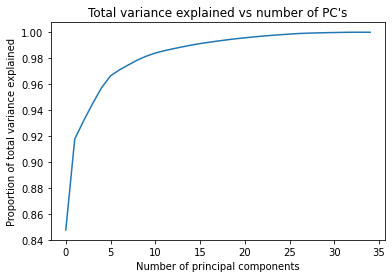

In [75]:
pca = PCA(n_components = train_data.shape[1])
X_train_pca = pca.fit_transform(train_data.fillna(0))
explained_variances = np.cumsum(pca.explained_variance_ratio_)

display(pd.DataFrame(explained_variances[:15]))

plt.plot(explained_variances)
plt.xlabel("Number of principal components")
plt.ylabel("Proportion of total variance explained")
plt.title("Total variance explained vs number of PC's")

Let's see what 2 principal components can capture in terms of the executed versus not executed!

Text(0.5, 1.0, "First two PC's, distinguished by executed vs non-executed")

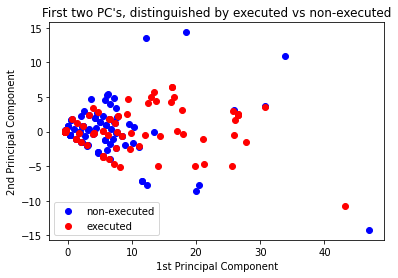

In [76]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(train_data)
X_train_pca_df = pd.DataFrame(X_train_pca)
X_train_pca_df = X_train_pca_df.assign(label = train_labels)
X_train_pca_df_non_executed, X_train_pca_df_executed = X_train_pca_df[X_train_pca_df['label'] == 0], X_train_pca_df[X_train_pca_df['label'] == 1]
plt.scatter(X_train_pca_df_non_executed.loc[:, 0], X_train_pca_df_non_executed.loc[:, 1], color = 'blue', label = "non-executed")
plt.scatter(X_train_pca_df_executed.loc[:, 0], X_train_pca_df_executed.loc[:, 1], color = 'red', label = "executed")
plt.legend()
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First two PC's, distinguished by executed vs non-executed")

### Information Gain

In [77]:
# This came from: https://github.com/MIDS-W207/cilin-coursework/blob/master/live_sessions/week04/decission_tree_classifier.ipynb

def entropy(distribution):
    ''' Computes the entropy index
    # param distribution: list containing distributions
    # return entropy index
    '''
    entropy_index = 0.0
    for probability in distribution:
        logprob = -100.0  # log(0) = -inf so let's approximate it with -100 to avoid an error
        if probability > 0.0: 
            logprob = np.log2(probability)
        entropy_index -= probability * logprob
        
    return entropy_index

def get_parent_distribution(labels):
    ''' Computes parent distirbution
    # param labels: << your turn to comment here >>
    # return: <<your turn to comment here >>
    '''
    # Initialize counters for all labels to zero.
    label_probs = np.array([0.0 for i in range(len(np.unique(labels)))])

    # Iterate over labels in the training data and update counts.
    for label in labels:
        label_probs[label] += 1.0
    
    # Normalize to get a distribution.
    label_probs /= label_probs.sum()
    
    return label_probs

def information_gain(data, labels, feature, threshold=0):
    ''' Computes information gain
    # param data: an array of featurized examples
    # param labels: an array of labels corresponding to the the data
    # param feature: the feature to use to split the data
    # param threshold: the feature value to use to split the data (the default threshold is good for binary features)
    '''
    # Get the initial entropy of the label distribution.
    initial_entropy = entropy(get_parent_distribution(labels))
    
    # subset0 will contain the labels for which the feature is 0 and
    # subset1 will contain the labels for which the feature is 1.
    subset0, subset1 = [], []
    for datum, label in zip(data, labels):
        # Added this because datum is sometimes not a data value but a column name itself
        if datum in important_features:
            continue
        if datum[feature] > threshold:
            subset1.append(label)
        else: 
            subset0.append(label)
    
    # Compute the entropy of each subset.
    subset0_entropy = entropy(get_parent_distribution(subset0))
    subset1_entropy = entropy(get_parent_distribution(subset1))
    
    # Compute the final entropy by weighting each subset's entropy according to its size.
    subset0_weight = 1.0 * len(subset0) / len(labels)
    subset1_weight = 1.0 * len(subset1) / len(labels)
    final_entropy = subset0_weight * subset0_entropy + subset1_weight * subset1_entropy
    
    # Finally, compute information gain as the difference between the initial and final entropy.
    return initial_entropy - final_entropy

In [78]:
for feature in range(1, len(important_features)):
    IG = information_gain(train_data, train_labels.fillna(0).astype(int), feature)
    print ('%d %.3f %s' %(feature, IG, important_features[feature]))

1 0.358 Sex
2 0.358 Arrest
3 0.358 Fled
4 0.358 ActionDropped
5 0.358 High_status
6 0.358 Male_accusers
7 0.358 Female_accusers
8 0.358 WhiteMagic_p
9 0.358 WhiteMagic_s
10 0.358 Folk_healing_p
11 0.358 Folk_healing_s
12 0.358 Demonic_possess_p
13 0.358 Demonic_possess_s
14 0.358 UNorthodoxRelPract_p
15 0.358 UNorthodoxRelPract_s
16 0.358 UnorthodoxReligiousPractice
17 0.358 HealingHumans
18 0.358 HealingAnimals
19 0.358 Neighbhd_dispute_p
20 0.358 Neighbhd_dispute_s
21 0.358 PoliticalMotive_p
22 0.358 PoliticalMotive_s
23 0.358 PropertyMotive_p
24 0.358 PropertyMotive_s
25 0.358 RefusedCharity_p
26 0.358 RefusedCharity_s
27 0.358 Treason_p
28 0.358 Treason_s
29 0.358 Quarreling
30 0.358 Cursing
31 0.358 Poisoning
32 0.358 RecHealer
33 0.358 Dancing
34 0.358 Singing
35 0.358 Midwifery


# Logistic Regression

In [105]:
model = LogisticRegression()
# Clean out NA values in train data to fit model -- here I'm filling them with 0s
X_train = train_data.fillna(0)
train_labels = train_labels.fillna(0)
X_test = test_data.fillna(0)
test_labels =  test_labels.fillna(0)

#Fit model then print the features with their coefficient values from the logistic regression model 
model.fit(X_train, train_labels)
features_coef = []
for i in range(35):
    features_coef.append((model.coef_[0][i], X_train.columns[i]))

#Turn to data frame
df = pd.DataFrame(features_coef, columns=['Coefficient_value', 'Feature_name'])
df

,Coefficient_value,Feature_name
0,0.259794,Sex
1,0.867123,Arrest
2,0.450240,Fled
3,-0.680567,ActionDropped
4,0.575010,High_status
5,0.110515,Male_accusers
6,0.038872,Female_accusers
7,-0.199144,WhiteMagic_p
8,0.116633,WhiteMagic_s
9,-0.216693,Folk_healing_p


In [107]:
#The coefficients with the maximum distance away from 0 are the more influential features. We name top5. here
print("The top 5 features in order of importance are: PoliticalMotive_p, Dancing, RecHealer, Cursing, and Arrest")
top5_features = [PoliticalMotive_p, Dancing, RecHealer, Cursing, Arrest]

plt.plot(X_test, model.coef_ * X_test + model.intercept_, linewidth=1)

The top 5 features in order of importance are: PoliticalMotive_p, Dancing, RecHealer, Cursing, and Arrest


ValueError: Unable to coerce to Series, length must be 35: given 1

In [90]:
help( LogisticRegression())

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '